<a href="https://colab.research.google.com/github/merdogan97/Machine-Learning-ML-/blob/main/ML_Assignment2_Solution_13_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart-stroke prediction

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type(göğüs agrısı) | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest (Dinlenmeye göre egzersizin neden olduğu ST depresyonu)
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping (maxium egzersizde ST segmentinin eğimi)
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

    https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [9]:
df = pd.read_csv('heart.csv')

In [10]:
df.sample(10) 
# cp(göğüs agrısı tipi) ,restecg(dinlenme kardiografi sonuçları) ,slope(maxium egzersizde ST segmentinin eğilimi) , thal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [13]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [14]:
df.drop(df.loc[df['thal']==0].index, inplace=True)

In [15]:
df.thal.value_counts(), df.cp.value_counts(), df.slope.value_counts(), df.restecg.value_counts()

(2    166
 3    117
 1     18
 Name: thal, dtype: int64, 0    142
 2     86
 1     50
 3     23
 Name: cp, dtype: int64, 2    141
 1    139
 0     21
 Name: slope, dtype: int64, 1    151
 0    146
 2      4
 Name: restecg, dtype: int64)

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [18]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [19]:
df['slope']=df['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

In [20]:
df['thal']=df['thal'].replace({1:'normal',2:'fixed defect',3:'reversable defect'})

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,upsloping,0,normal,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,upsloping,0,fixed defect,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,downsloping,0,fixed defect,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,downsloping,0,fixed defect,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,downsloping,0,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.2,flat,0,reversable defect,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.2,flat,0,reversable defect,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.4,flat,2,reversable defect,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.2,flat,1,reversable defect,0


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,301.0,54.378738,9.110950,29.0,47.0,56.0,61.0,77.0
sex,301.0,0.684385,0.465534,0.0,0.0,1.0,1.0,1.0
trestbps,301.0,131.647841,17.594002,94.0,120.0,130.0,140.0,200.0
chol,301.0,246.504983,51.915998,126.0,211.0,241.0,275.0,564.0
fbs,301.0,0.146179,0.353874,0.0,0.0,0.0,0.0,1.0
thalach,301.0,149.740864,22.891031,71.0,134.0,153.0,166.0,202.0
exang,301.0,0.325581,0.469372,0.0,0.0,0.0,1.0,1.0
oldpeak,301.0,1.043189,1.163384,0.0,0.0,0.8,1.6,6.2
ca,301.0,0.734219,1.024268,0.0,0.0,0.0,1.0,4.0
target,301.0,0.544850,0.498814,0.0,0.0,1.0,1.0,1.0


In [23]:
df.shape

(301, 14)

In [24]:
df.target.value_counts(normalize=True)

1    0.54485
0    0.45515
Name: target, dtype: float64

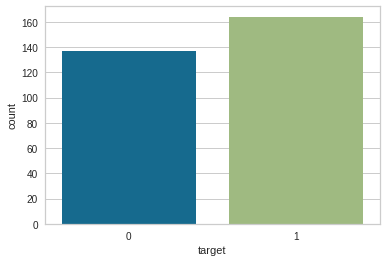

In [25]:
sns.countplot(df.target);

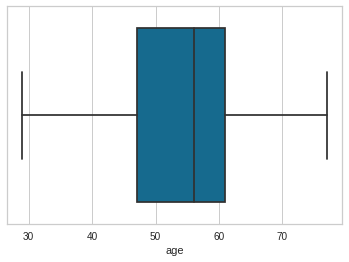

In [26]:
sns.boxplot(df.age);

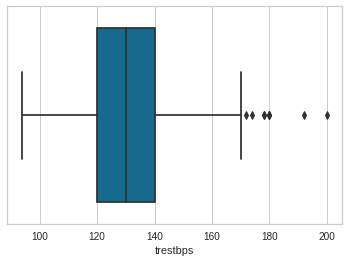

In [27]:
sns.boxplot(df.trestbps); # dinlenme kan basıncı

In [28]:
#df=df[df.trestbps<170]

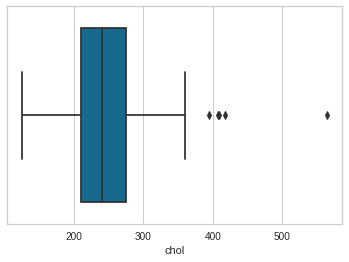

In [29]:
sns.boxplot(df.chol);

In [30]:
#df=df[df.chol<370]

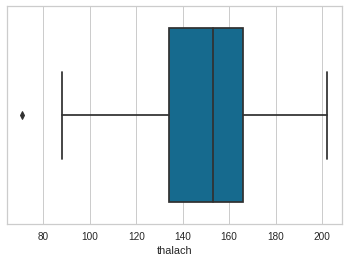

In [31]:
sns.boxplot(df.thalach);  # max kalp atışı

In [32]:
#df=df[df.thalach>80]  

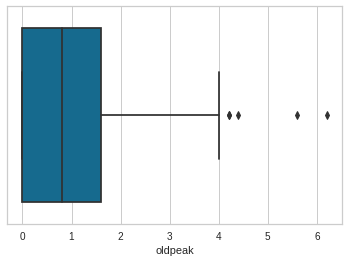

In [33]:
sns.boxplot(df.oldpeak);  # egzersize bağlı st depresyonu

In [34]:
#df=df[df.oldpeak<4]

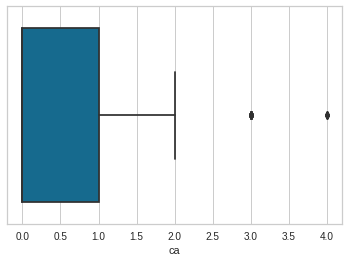

In [35]:
sns.boxplot(df.ca);  # floroskopi ile renklendirilen ana damar sayısı (0-3)

In [36]:
#df=df[df.ca<2.5]

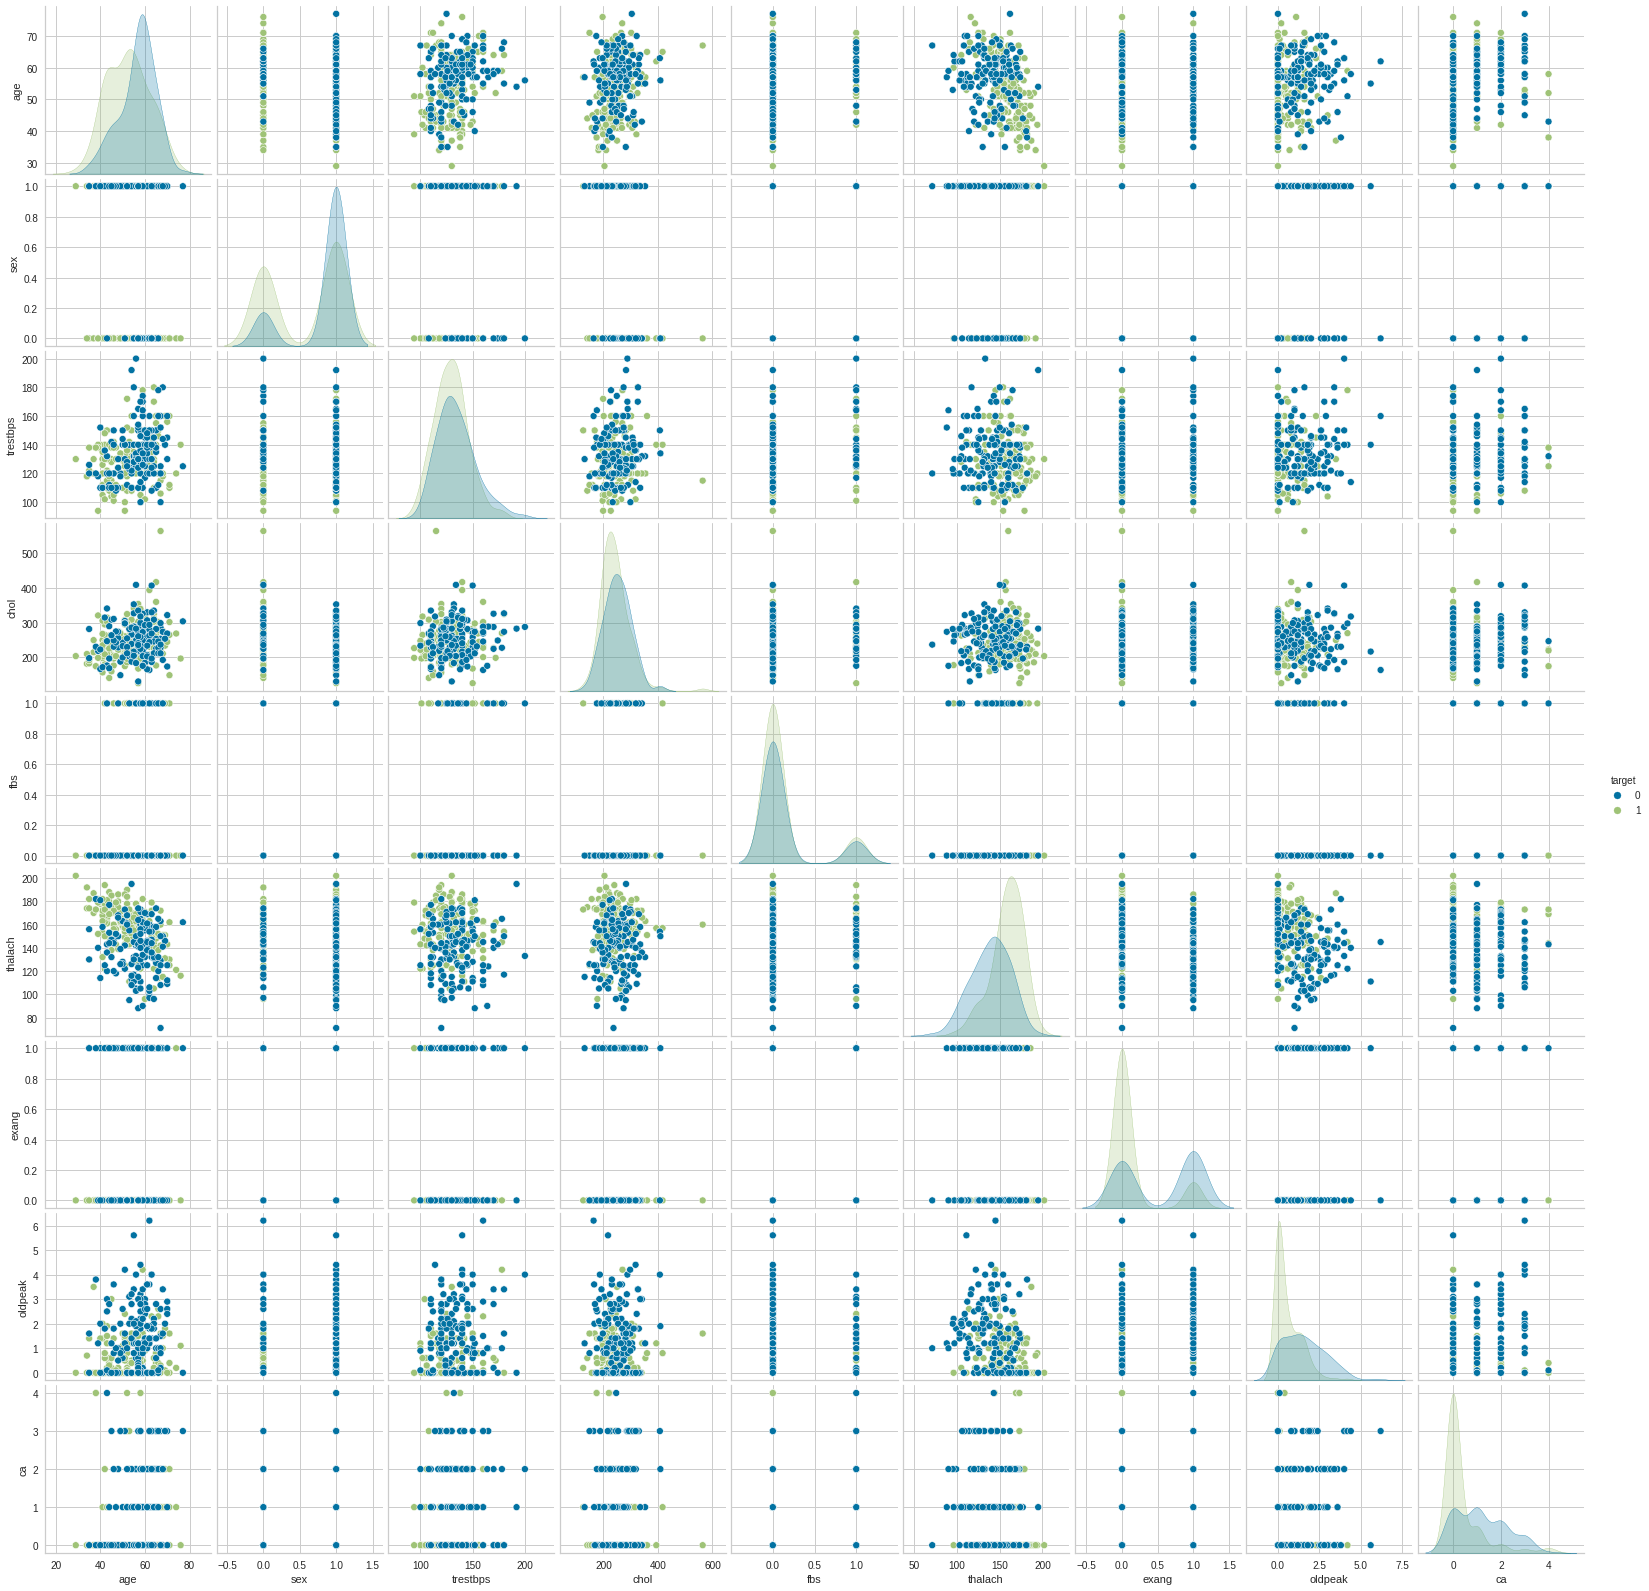

In [37]:
sns.pairplot(df.select_dtypes(include='number'), hue = "target")  # Green:1 Blue:0

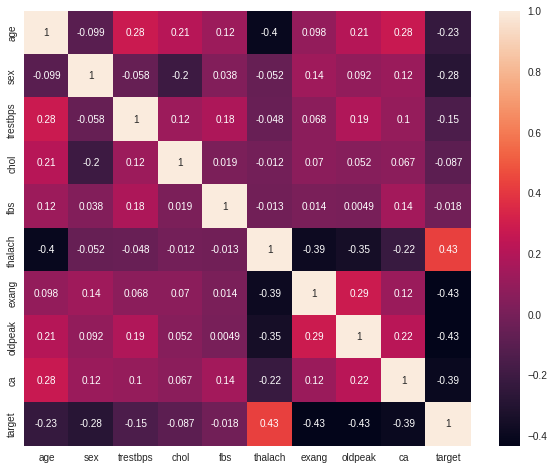

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## Train | Test Split and Scaling

In [39]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,1,0,1,1,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,0,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,0,0,1,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,0,1,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   301 non-null    int64  
 1   sex                                   301 non-null    int64  
 2   trestbps                              301 non-null    int64  
 3   chol                                  301 non-null    int64  
 4   fbs                                   301 non-null    int64  
 5   thalach                               301 non-null    int64  
 6   exang                                 301 non-null    int64  
 7   oldpeak                               301 non-null    float64
 8   ca                                    301 non-null    int64  
 9   target                                301 non-null    int64  
 10  cp_atypical angina                    301 non-null    uint8  
 11  cp_non-anginal pain

In [41]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=5)

In [43]:
scaler =MinMaxScaler() 

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [46]:
log_model = LogisticRegression()

In [47]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [48]:
y_pred=log_model.predict(X_test_scaled)

In [49]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

## Model Performance

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[24  4]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Train_Set
[[ 88  21]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.85      0.88      0.86       131

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



### Cross Validate

In [52]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.015980,0.004591,0.888889,0.571429,0.695652,0.708333
2,0.008502,0.002937,0.866667,1.000000,0.928571,0.916667
3,0.007165,0.007005,0.916667,0.846154,0.880000,0.875000
4,0.008764,0.003037,0.923077,0.923077,0.923077,0.916667
5,0.006682,0.002938,0.800000,0.923077,0.857143,0.833333
6,0.008187,0.002956,0.764706,1.000000,0.866667,0.833333
7,0.009760,0.004235,1.000000,0.769231,0.869565,0.875000
8,0.007500,0.003088,0.769231,0.769231,0.769231,0.750000
9,0.008282,0.003044,0.666667,0.923077,0.774194,0.708333
10,0.008611,0.002961,0.800000,0.923077,0.857143,0.833333


In [53]:
df_scores.mean()[2:]     

test_precision    0.839590
test_recall       0.864835
test_f1           0.842124
test_accuracy     0.825000
dtype: float64

In [54]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)  #   accuracy:0.82   

Test_Set
[[24  4]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Train_Set
[[ 88  21]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.85      0.88      0.86       131

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



### GridSearchCV

In [55]:
C = np.logspace(-1, 5, 100)
C

array([1.00000000e-01, 1.14975700e-01, 1.32194115e-01, 1.51991108e-01,
       1.74752840e-01, 2.00923300e-01, 2.31012970e-01, 2.65608778e-01,
       3.05385551e-01, 3.51119173e-01, 4.03701726e-01, 4.64158883e-01,
       5.33669923e-01, 6.13590727e-01, 7.05480231e-01, 8.11130831e-01,
       9.32603347e-01, 1.07226722e+00, 1.23284674e+00, 1.41747416e+00,
       1.62975083e+00, 1.87381742e+00, 2.15443469e+00, 2.47707636e+00,
       2.84803587e+00, 3.27454916e+00, 3.76493581e+00, 4.32876128e+00,
       4.97702356e+00, 5.72236766e+00, 6.57933225e+00, 7.56463328e+00,
       8.69749003e+00, 1.00000000e+01, 1.14975700e+01, 1.32194115e+01,
       1.51991108e+01, 1.74752840e+01, 2.00923300e+01, 2.31012970e+01,
       2.65608778e+01, 3.05385551e+01, 3.51119173e+01, 4.03701726e+01,
       4.64158883e+01, 5.33669923e+01, 6.13590727e+01, 7.05480231e+01,
       8.11130831e+01, 9.32603347e+01, 1.07226722e+02, 1.23284674e+02,
       1.41747416e+02, 1.62975083e+02, 1.87381742e+02, 2.15443469e+02,
      

In [56]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [57]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [58]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [59]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  

# Train_set accuracy : 0.85------->0.86

# Test_set accuracy : 0.89 (0.82 cross validation)------->0.89

# log_model final  Accuracy Score: 0.89 ------------- > 7 wrong prediction

Test_Set
[[24  4]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Train_Set
[[ 91  18]
 [ 15 116]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.87      0.89      0.88       131

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [60]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

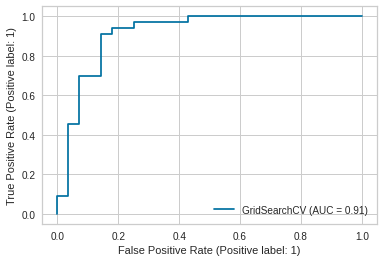

In [92]:
plot_roc_curve(grid_model, X_test_scaled, y_test) # genel performeancı gösteriyor.Köşenin sol üst köşeye 1 e yaklaşmasını bekleriz.

In [ ]:
# Blance datalarda ROC'a bakarız. Unbalance datalarda ROC'a bakılmaz#

## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [65]:
knn_pred = knn.predict(X_test_scaled)

In [66]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  20]
 [ 17 114]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.85      0.87      0.86       131

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



### Elbow Method for Choosing Reasonable K Values

In [67]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [68]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

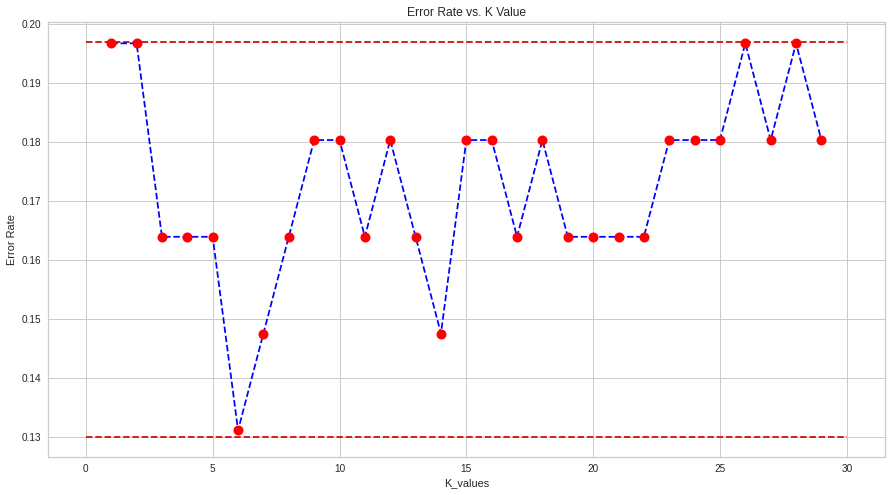

In [69]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.197, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.13, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values

In [70]:
knn = KNeighborsClassifier(n_neighbors=6)  # accuracy:0.87 -------> 8 wrong prediction
knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=6

Test_Set
[[24  4]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set
[[ 94  15]
 [ 19 112]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.88      0.85      0.87       131

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [71]:
knn = KNeighborsClassifier(n_neighbors=5)  # accuracy:0.84 -------> 10 wrong prediction

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=5

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  20]
 [ 17 114]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.85      0.87      0.86       131

    accuracy                           0.85       240
   macro avg       0.85      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



In [72]:
knn = KNeighborsClassifier(n_neighbors=7)   # accuracy:0.85 -------> 9 wrong prediction

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set
[[21  7]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61


Train_Set
[[ 90  19]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.86      0.88      0.87       131

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [73]:
knn = KNeighborsClassifier(n_neighbors=14)   # accuracy:0.85 -------> 9 wrong prediction

knn.fit(X_train_scaled,y_train)
print('WITH 14K=\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH 14K=

Test_Set
[[23  5]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set
[[ 89  20]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.85      0.86      0.86       131

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240



In [74]:
knn = KNeighborsClassifier(n_neighbors=10)   # accuracy:0.82 -------> 11 wrong prediction

knn.fit(X_train_scaled,y_train)
print('WITH 10K=\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH 10K=

Test_Set
[[22  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
[[ 90  19]
 [ 21 110]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.85      0.84      0.85       131

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.83      0.83       240



### Cross Validate

In [75]:
model =KNeighborsClassifier(n_neighbors=6)  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.001509,0.012168,1.000000,0.642857,0.782609,0.791667
2,0.001167,0.006771,0.923077,0.923077,0.923077,0.916667
3,0.001958,0.006980,0.833333,0.769231,0.800000,0.791667
4,0.001181,0.006357,1.000000,0.923077,0.960000,0.958333
5,0.001172,0.005986,0.857143,0.923077,0.888889,0.875000
6,0.001083,0.005784,0.733333,0.846154,0.785714,0.750000
7,0.001098,0.005789,0.888889,0.615385,0.727273,0.750000
8,0.000841,0.004022,0.916667,0.846154,0.880000,0.875000
9,0.001058,0.007216,0.714286,0.769231,0.740741,0.708333
10,0.001673,0.011188,0.785714,0.846154,0.814815,0.791667


In [76]:
df_scores.mean()[2:]        

test_precision    0.865244
test_recall       0.810440
test_f1           0.830312
test_accuracy     0.820833
dtype: float64

In [77]:
knn = KNeighborsClassifier(n_neighbors=6)  # test_accuracy:    0.87 , train_accuracy :  0.86
                                              
                                           # test_accuracy     0.82  (cross validation)
                                            
                                           # knn final test_accuracy :   0.87     (k=6 with elbow) with 8 wrong prediction
knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=6

Test_Set
[[24  4]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set
[[ 94  15]
 [ 19 112]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.88      0.85      0.87       131

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240




### Gridsearch Method for Choosing Reasonable K Values

In [78]:
knn_grid = KNeighborsClassifier()

In [79]:
k_values= range(1,30)

In [80]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
# p=1(manhattan), p=2(euclidan)
# uniform(equal weight), distance(weight based distance)

In [81]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [82]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [83]:
knn_grid_model.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

In [84]:
print('WITH K=10\n')      #  knn      test_accuracy :   0.82  (k=10 with gridsearch) with 11 wrong prediction

                          #  knn      test_accuracy :   0.87  (k=6 with elbow)  with 8 wrong prediction
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set
[[22  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
[[ 90  19]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.86      0.88      0.87       131

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



### Evaluating ROC Curves and AUC

In [85]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [86]:
knn_model = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

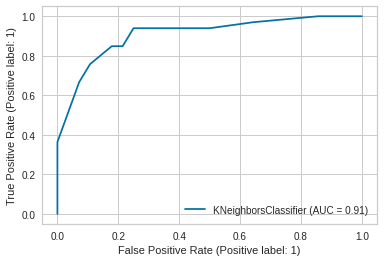

In [87]:
plot_roc_curve(knn_model, X_test_scaled, y_test) #  knn test_accuracy :   0.82  (k=10 with gridsearch) with 11 wrong prediction

In [88]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.906926406926407

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=6).fit(X_train_scaled, y_train)

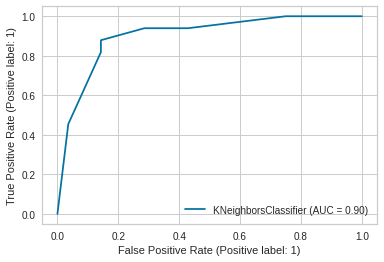

In [90]:
plot_roc_curve(knn_model, X_test_scaled, y_test)  #  knn test_accuracy :   0.87  (k=6 with elbow)  with 8 wrong prediction

# Final Model

In [91]:
# log_model  Accuracy Score: 0.89 ------------- > 7 wrong prediction